In [1]:
# =============================================================================
# MODÉLISATION ML - PRÉDICTION DES PRIX IMMOBILIERS
# =============================================================================
# Objectif : Entraîner et comparer plusieurs modèles de régression pour prédire
# le prix des biens immobiliers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

print("✅ Librairies chargées avec succès")

✅ Librairies chargées avec succès


In [2]:
# =============================================================================
# CHARGEMENT DES DONNÉES PRÉTRAITÉES
# =============================================================================

# Charger le dataset prétraité
df = pd.read_csv('../Data/raw/transactions_preprocessed.csv')

print(f"📊 Dataset chargé : {df.shape[0]} observations, {df.shape[1]} colonnes")
print(f"\n📋 Colonnes disponibles :")
print(df.columns.tolist())
df.head()

📊 Dataset chargé : 100 observations, 14 colonnes

📋 Colonnes disponibles :
['surface_habitable', 'n_pieces', 'type_batiment_encoded', 'vefa_encoded', 'loyer_m2_local', 'revenu_fiscal_moyen', 'surface_par_piece', 'is_idf', 'latitude', 'longitude', 'prix', 'ville', 'departement', 'type_batiment']


,surface_habitable,n_pieces,type_batiment_encoded,vefa_encoded,loyer_m2_local,revenu_fiscal_moyen,surface_par_piece,is_idf,latitude,longitude,prix,ville,departement,type_batiment
0,123,4,1,0,6.932478,22573.926667,30.750000,0,45.572973,2.949976,222500.0,MUROL,63,Maison
1,23,1,0,0,10.434312,35757.748889,23.000000,0,45.398740,6.567602,218640.0,LES ALLUES,73,Appartement
2,124,6,1,0,11.654518,32348.473333,20.666667,1,48.333762,2.780830,254950.0,MORET-LOING-ET-ORVANNE,77,Maison
3,93,3,1,0,17.237152,21728.814286,31.000000,1,48.796988,2.375558,380000.0,VITRY-SUR-SEINE,94,Maison
4,96,5,1,0,12.031014,21260.924444,19.200000,1,48.948816,2.891734,258000.0,MEAUX,77,Maison


In [3]:
# =============================================================================
# PRÉPARATION DES FEATURES ET TARGET
# =============================================================================

# Définir les features et la target
feature_cols = ['surface_habitable', 'n_pieces', 'type_batiment_encoded', 'vefa_encoded',
                'loyer_m2_local', 'revenu_fiscal_moyen', 'surface_par_piece', 'is_idf',
                'latitude', 'longitude']

X = df[feature_cols]
y = df['prix']

# Division train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Ensemble d'entraînement : {X_train.shape[0]} observations")
print(f"📊 Ensemble de test : {X_test.shape[0]} observations")
print(f"\n📋 Features utilisées ({len(feature_cols)}) :")
for i, col in enumerate(feature_cols, 1):
    print(f"   {i}. {col}")

📊 Ensemble d'entraînement : 80 observations
📊 Ensemble de test : 20 observations

📋 Features utilisées (10) :
   1. surface_habitable
   2. n_pieces
   3. type_batiment_encoded
   4. vefa_encoded
   5. loyer_m2_local
   6. revenu_fiscal_moyen
   7. surface_par_piece
   8. is_idf
   9. latitude
   10. longitude


In [4]:
# =============================================================================
# NORMALISATION DES DONNÉES
# =============================================================================

# Normalisation avec StandardScaler pour améliorer la convergence des modèles
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Données normalisées (StandardScaler)")
print(f"   Moyenne des features après normalisation : {X_train_scaled.mean(axis=0).round(2)}")
print(f"   Écart-type après normalisation : {X_train_scaled.std(axis=0).round(2)}")

✅ Données normalisées (StandardScaler)
   Moyenne des features après normalisation : [ 0.  0.  0.  0. -0.  0.  0.  0. -0.  0.]
   Écart-type après normalisation : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
# =============================================================================
# DÉFINITION ET ENTRAÎNEMENT DES MODÈLES
# =============================================================================

# Dictionnaire des modèles à comparer
models = {
    'Régression Linéaire': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# Stocker les résultats
results = []

print("🔄 Entraînement des modèles en cours...\n")
print("-" * 80)

for name, model in models.items():
    # Utiliser données normalisées pour la régression linéaire
    if 'Régression' in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Random Forest utilise les données brutes
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculer les métriques
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Modèle': name,
        'MAE (€)': mae,
        'RMSE (€)': rmse,
        'R² Score': r2
    })
    
    print(f"✅ {name}")
    print(f"   MAE: {mae:,.0f} € | RMSE: {rmse:,.0f} € | R²: {r2:.4f}")
    print()

print("-" * 80)
print("🎯 Entraînement terminé !")

🔄 Entraînement des modèles en cours...

--------------------------------------------------------------------------------
✅ Régression Linéaire
   MAE: 65,754 € | RMSE: 83,712 € | R²: 0.5098

✅ Random Forest
   MAE: 53,169 € | RMSE: 67,138 € | R²: 0.6847

--------------------------------------------------------------------------------
🎯 Entraînement terminé !


In [9]:
# =============================================================================
# COMPARAISON DES MODÈLES (TABLEAU RÉCAPITULATIF)
# =============================================================================

# Créer DataFrame des résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R² Score', ascending=False)
results_df['MAE (€)'] = results_df['MAE (€)'].apply(lambda x: f"{x:,.0f}")
results_df['RMSE (€)'] = results_df['RMSE (€)'].apply(lambda x: f"{x:,.0f}")
results_df['R² Score'] = results_df['R² Score'].apply(lambda x: f"{x:.4f}")

print("📊 COMPARAISON DES MODÈLES (classés par R² décroissant)")
print("=" * 70)
print(results_df.to_string(index=False))
print("=" * 70)

# Identifier le meilleur modèle
best_model_name = results[0]['Modèle']
for r in results:
    if float(r['R² Score']) == max([float(res['R² Score']) for res in results]):
        best_model_name = r['Modèle']
        
print(f"\n🏆 Meilleur modèle : {best_model_name}")

📊 COMPARAISON DES MODÈLES (classés par R² décroissant)
             Modèle MAE (€) RMSE (€) R² Score
      Random Forest  53,169   67,138   0.6847
Régression Linéaire  65,754   83,712   0.5098

🏆 Meilleur modèle : Random Forest


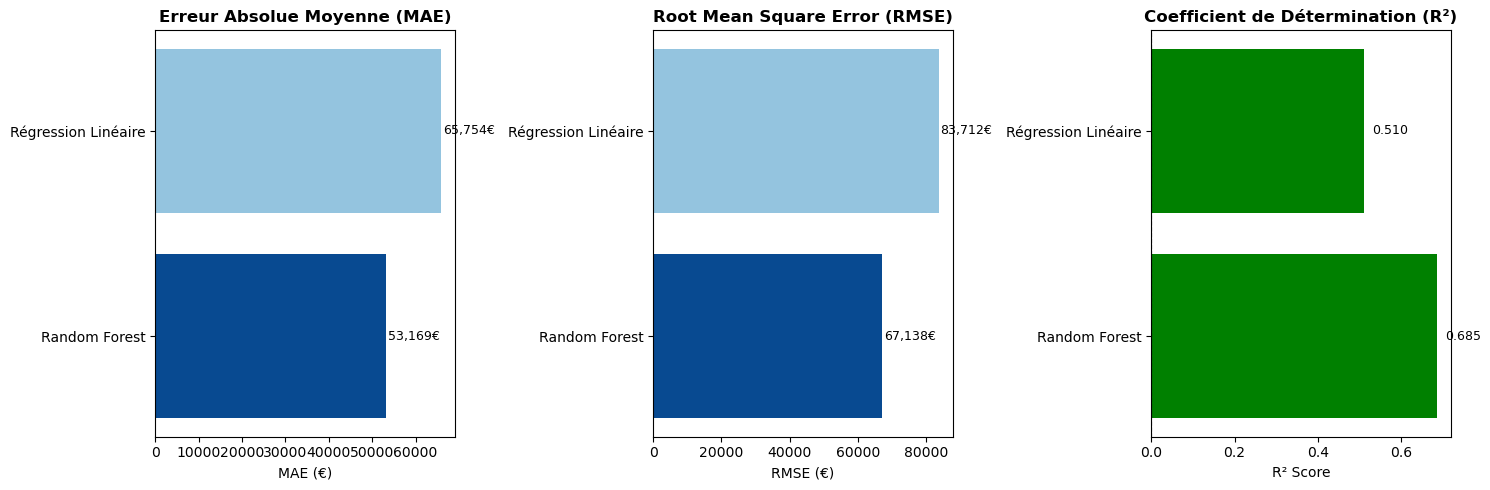

📁 Graphique sauvegardé : comparaison_modeles.png


In [10]:
# =============================================================================
# VISUALISATION - COMPARAISON DES PERFORMANCES
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Récupérer les données non formatées
results_raw = []
for name, model in models.items():
    if 'Régression' in name:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    results_raw.append({
        'Modèle': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results_raw)

# Graphique 1: MAE
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(models)))
ax1 = axes[0]
bars1 = ax1.barh(df_results['Modèle'], df_results['MAE'], color=colors)
ax1.set_xlabel('MAE (€)')
ax1.set_title('Erreur Absolue Moyenne (MAE)', fontweight='bold')
ax1.invert_yaxis()
for bar, val in zip(bars1, df_results['MAE']):
    ax1.text(val + 500, bar.get_y() + bar.get_height()/2, f'{val:,.0f}€', va='center', fontsize=9)

# Graphique 2: RMSE
ax2 = axes[1]
bars2 = ax2.barh(df_results['Modèle'], df_results['RMSE'], color=colors)
ax2.set_xlabel('RMSE (€)')
ax2.set_title('Root Mean Square Error (RMSE)', fontweight='bold')
ax2.invert_yaxis()
for bar, val in zip(bars2, df_results['RMSE']):
    ax2.text(val + 500, bar.get_y() + bar.get_height()/2, f'{val:,.0f}€', va='center', fontsize=9)

# Graphique 3: R²
ax3 = axes[2]
colors_r2 = ['green' if x > 0 else 'red' for x in df_results['R²']]
bars3 = ax3.barh(df_results['Modèle'], df_results['R²'], color=colors_r2)
ax3.set_xlabel('R² Score')
ax3.set_title('Coefficient de Détermination (R²)', fontweight='bold')
ax3.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
ax3.invert_yaxis()
for bar, val in zip(bars3, df_results['R²']):
    ax3.text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../N/comparaison_modeles.png', dpi=150, bbox_inches='tight')
plt.show()

print("📁 Graphique sauvegardé : comparaison_modeles.png")

In [11]:
# =============================================================================
# OPTIMISATION HYPERPARAMÈTRES - RANDOM FOREST (GridSearchCV)
# =============================================================================

print("🔧 Optimisation des hyperparamètres du Random Forest...")
print("   Cela peut prendre quelques minutes...\n")

# Définir la grille de recherche
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV avec validation croisée
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("\n" + "=" * 60)
print("🏆 MEILLEURS HYPERPARAMÈTRES TROUVÉS :")
print("=" * 60)
for param, value in rf_grid.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n📊 Meilleur score R² (CV): {rf_grid.best_score_:.4f}")

🔧 Optimisation des hyperparamètres du Random Forest...
   Cela peut prendre quelques minutes...

Fitting 5 folds for each of 108 candidates, totalling 540 fits

🏆 MEILLEURS HYPERPARAMÈTRES TROUVÉS :
   max_depth: 5
   min_samples_leaf: 2
   min_samples_split: 2
   n_estimators: 200

📊 Meilleur score R² (CV): 0.4518


In [12]:
# =============================================================================
# ÉVALUATION DU MODÈLE OPTIMISÉ
# =============================================================================

# Récupérer le meilleur modèle
best_rf = rf_grid.best_estimator_

# Prédictions sur l'ensemble de test
y_pred_optimized = best_rf.predict(X_test)

# Métriques
mae_opt = mean_absolute_error(y_test, y_pred_optimized)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
r2_opt = r2_score(y_test, y_pred_optimized)

print("=" * 60)
print("📊 PERFORMANCE DU RANDOM FOREST OPTIMISÉ (Test Set)")
print("=" * 60)
print(f"   MAE  : {mae_opt:,.0f} €")
print(f"   RMSE : {rmse_opt:,.0f} €")
print(f"   R²   : {r2_opt:.4f}")
print("=" * 60)

# Comparaison avec le modèle de base
mae_base = mean_absolute_error(y_test, models['Random Forest'].predict(X_test))
print(f"\n📈 Amélioration MAE: {(mae_base - mae_opt):,.0f} € ({((mae_base - mae_opt)/mae_base)*100:.1f}%)")

📊 PERFORMANCE DU RANDOM FOREST OPTIMISÉ (Test Set)
   MAE  : 55,936 €
   RMSE : 73,602 €
   R²   : 0.6211

📈 Amélioration MAE: -2,767 € (-5.2%)


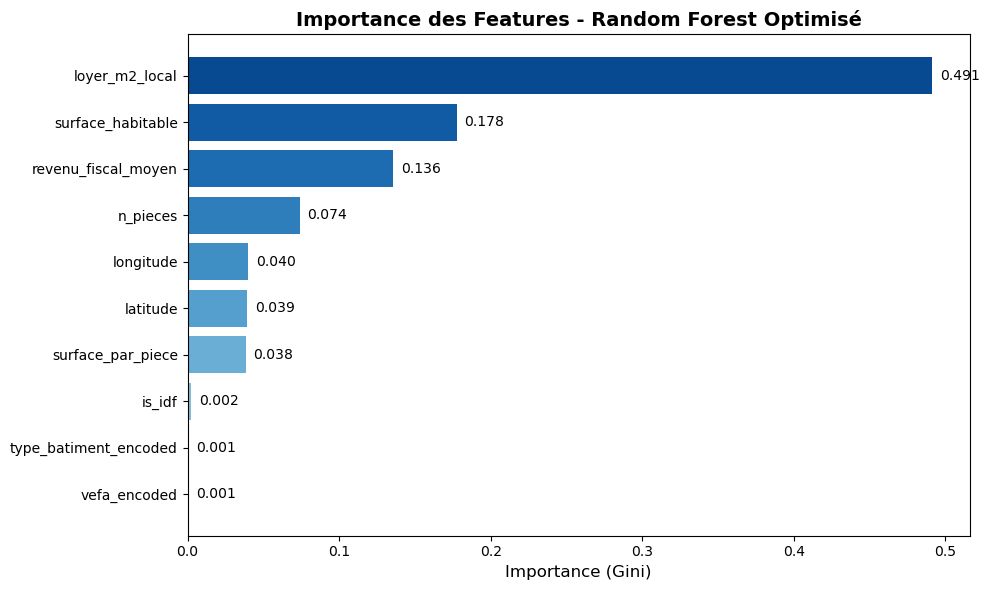


📋 Top 3 des features les plus importantes :
   1. revenu_fiscal_moyen (0.136)
   2. surface_habitable (0.178)
   3. loyer_m2_local (0.491)

📁 Graphique sauvegardé : feature_importance.png


In [13]:
# =============================================================================
# IMPORTANCE DES FEATURES
# =============================================================================

# Récupérer l'importance des features
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=True)

# Visualisation
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(feature_importance)))
bars = ax.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
ax.set_xlabel('Importance (Gini)', fontsize=12)
ax.set_title('Importance des Features - Random Forest Optimisé', fontsize=14, fontweight='bold')

# Ajouter les valeurs
for bar, val in zip(bars, feature_importance['Importance']):
    ax.text(val + 0.005, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../N/feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📋 Top 3 des features les plus importantes :")
top3 = feature_importance.tail(3)
for i, (_, row) in enumerate(top3.iterrows(), 1):
    print(f"   {i}. {row['Feature']} ({row['Importance']:.3f})")

print("\n📁 Graphique sauvegardé : feature_importance.png")

In [14]:
# =============================================================================
# VALIDATION CROISÉE (CROSS-VALIDATION)
# =============================================================================

print("🔄 Validation croisée (5-Fold) en cours...")

# Cross-validation sur le meilleur modèle
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
cv_mae = -cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_absolute_error')

print("\n" + "=" * 60)
print("📊 RÉSULTATS VALIDATION CROISÉE (5-Fold)")
print("=" * 60)
print(f"\n🎯 R² Score par fold : {cv_scores.round(4)}")
print(f"   Moyenne R² : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"\n🎯 MAE par fold : {cv_mae.round(0).astype(int)}")
print(f"   Moyenne MAE : {cv_mae.mean():,.0f} € ± {cv_mae.std():,.0f} €")
print("=" * 60)

# Interprétation de la stabilité
if cv_scores.std() < 0.1:
    print("\n✅ Le modèle est STABLE (faible variance entre les folds)")
else:
    print("\n⚠️ Le modèle présente une certaine VARIABILITÉ entre les folds")

🔄 Validation croisée (5-Fold) en cours...

📊 RÉSULTATS VALIDATION CROISÉE (5-Fold)

🎯 R² Score par fold : [-0.6835  0.2122  0.648   0.5559 -0.3503]
   Moyenne R² : 0.0765 ± 0.5166

🎯 MAE par fold : [ 79008 124078  62579  63743  89802]
   Moyenne MAE : 83,842 € ± 22,512 €

⚠️ Le modèle présente une certaine VARIABILITÉ entre les folds


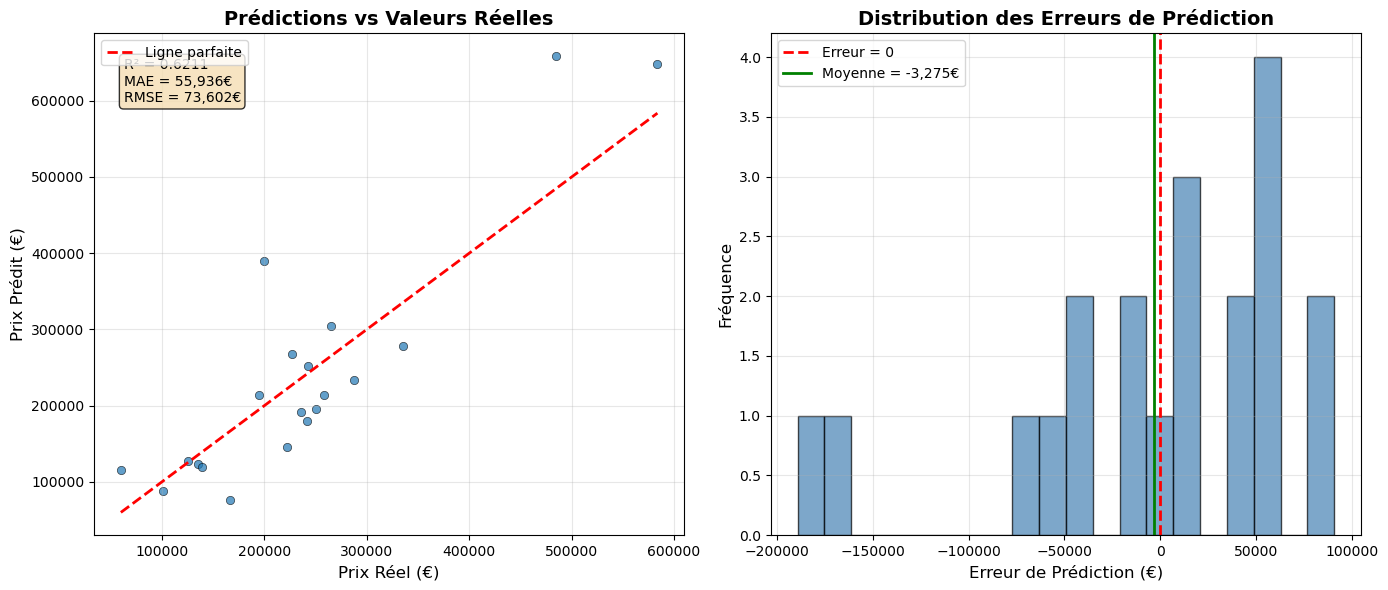

📁 Graphique sauvegardé : predictions_vs_reel.png


In [15]:
# =============================================================================
# VISUALISATION - PRÉDICTIONS VS VALEURS RÉELLES
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1: Scatter plot Prédictions vs Réel
ax1 = axes[0]
ax1.scatter(y_test, y_pred_optimized, alpha=0.7, edgecolors='black', linewidth=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ligne parfaite')
ax1.set_xlabel('Prix Réel (€)', fontsize=12)
ax1.set_ylabel('Prix Prédit (€)', fontsize=12)
ax1.set_title('Prédictions vs Valeurs Réelles', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Ajouter les métriques
textstr = f'R² = {r2_opt:.4f}\nMAE = {mae_opt:,.0f}€\nRMSE = {rmse_opt:,.0f}€'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

# Graphique 2: Distribution des erreurs
ax2 = axes[1]
errors = y_test - y_pred_optimized
ax2.hist(errors, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Erreur = 0')
ax2.axvline(x=errors.mean(), color='green', linestyle='-', linewidth=2, label=f'Moyenne = {errors.mean():,.0f}€')
ax2.set_xlabel('Erreur de Prédiction (€)', fontsize=12)
ax2.set_ylabel('Fréquence', fontsize=12)
ax2.set_title('Distribution des Erreurs de Prédiction', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../N/predictions_vs_reel.png', dpi=150, bbox_inches='tight')
plt.show()

print("📁 Graphique sauvegardé : predictions_vs_reel.png")

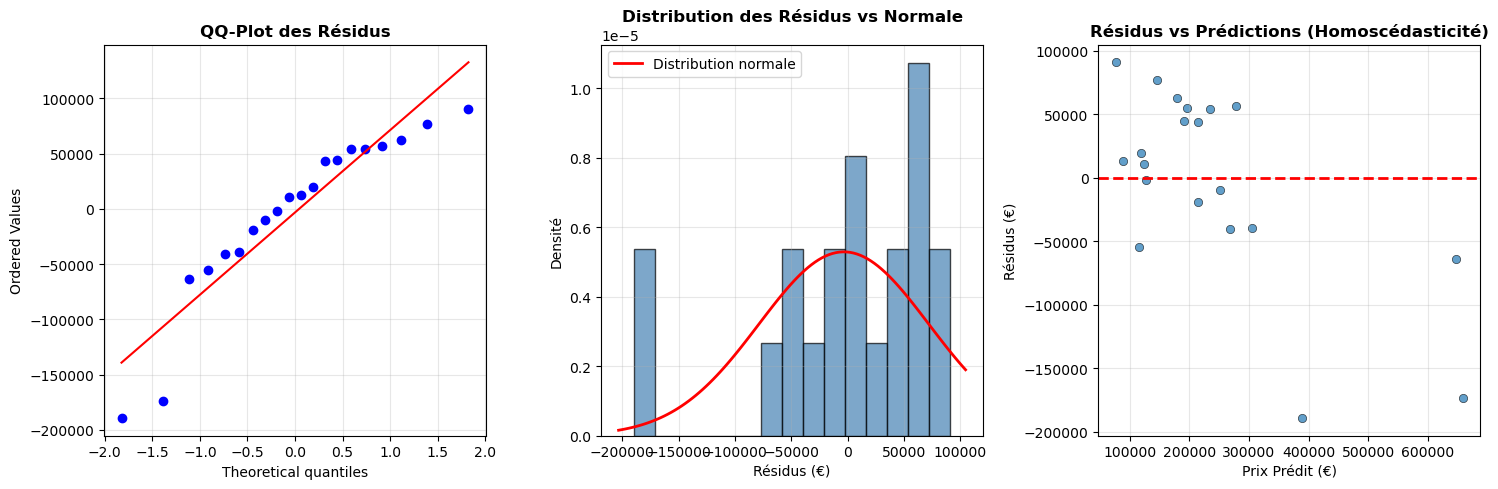

TEST DE NORMALITÉ DES RÉSIDUS (Shapiro-Wilk)
   Statistique W : 0.8790
   P-value       : 0.0170
   Résultat : Les résidus ne suivent pas parfaitement une loi normale
             Ceci est normal avec peu de données (n=20 en test)

Graphique sauvegardé : analyse_residus.png


In [16]:
# =============================================================================
# ANALYSE DES RÉSIDUS (QQ-PLOT)
# =============================================================================
# Vérifier si les erreurs suivent une distribution normale

from scipy import stats

# Calculer les résidus
residus = y_test - y_pred_optimized

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. QQ-Plot
ax1 = axes[0]
stats.probplot(residus, dist="norm", plot=ax1)
ax1.set_title('QQ-Plot des Résidus', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Distribution des résidus avec courbe normale
ax2 = axes[1]
ax2.hist(residus, bins=15, density=True, alpha=0.7, color='steelblue', edgecolor='black')
# Superposer la courbe normale théorique
xmin, xmax = ax2.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, residus.mean(), residus.std())
ax2.plot(x, p, 'r-', linewidth=2, label='Distribution normale')
ax2.set_xlabel('Résidus (€)')
ax2.set_ylabel('Densité')
ax2.set_title('Distribution des Résidus vs Normale', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Résidus vs Valeurs prédites (homoscédasticité)
ax3 = axes[2]
ax3.scatter(y_pred_optimized, residus, alpha=0.7, edgecolors='black', linewidth=0.5)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Prix Prédit (€)')
ax3.set_ylabel('Résidus (€)')
ax3.set_title('Résidus vs Prédictions (Homoscédasticité)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../N/analyse_residus.png', dpi=150, bbox_inches='tight')
plt.show()

# Test de normalité Shapiro-Wilk
stat, p_value = stats.shapiro(residus)
print("=" * 60)
print("TEST DE NORMALITÉ DES RÉSIDUS (Shapiro-Wilk)")
print("=" * 60)
print(f"   Statistique W : {stat:.4f}")
print(f"   P-value       : {p_value:.4f}")
if p_value > 0.05:
    print("   Résultat : Les résidus suivent une distribution normale (p > 0.05)")
else:
    print("   Résultat : Les résidus ne suivent pas parfaitement une loi normale")
    print("             Ceci est normal avec peu de données (n=20 en test)")
print("=" * 60)
print("\nGraphique sauvegardé : analyse_residus.png")

In [17]:
# =============================================================================
# EXEMPLES DE PRÉDICTIONS (3 BIENS FICTIFS)
# =============================================================================
# Démontrer l'utilisation concrète du modèle

print("=" * 70)
print("                 EXEMPLES DE PRÉDICTIONS")
print("=" * 70)

# Définir 3 biens fictifs représentatifs
exemples = [
    {
        'nom': 'Appartement T2 à Paris',
        'surface_habitable': 45,
        'n_pieces': 2,
        'type_batiment_encoded': 0,  # Appartement
        'vefa_encoded': 0,  # Ancien
        'loyer_m2_local': 25.0,  # Paris = loyer élevé
        'revenu_fiscal_moyen': 45000,
        'surface_par_piece': 22.5,
        'is_idf': 1,  # Île-de-France
        'latitude': 48.85,
        'longitude': 2.35
    },
    {
        'nom': 'Maison 5 pièces en Province',
        'surface_habitable': 120,
        'n_pieces': 5,
        'type_batiment_encoded': 1,  # Maison
        'vefa_encoded': 0,  # Ancien
        'loyer_m2_local': 9.0,  # Province = loyer modéré
        'revenu_fiscal_moyen': 25000,
        'surface_par_piece': 24.0,
        'is_idf': 0,
        'latitude': 45.75,
        'longitude': 4.85
    },
    {
        'nom': 'Appartement T3 Neuf (VEFA) Côte d\'Azur',
        'surface_habitable': 70,
        'n_pieces': 3,
        'type_batiment_encoded': 0,  # Appartement
        'vefa_encoded': 1,  # Neuf VEFA
        'loyer_m2_local': 16.0,  # Côte d'Azur
        'revenu_fiscal_moyen': 35000,
        'surface_par_piece': 23.3,
        'is_idf': 0,
        'latitude': 43.70,
        'longitude': 7.26
    }
]

# Prédire les prix
print("\n")
for i, bien in enumerate(exemples, 1):
    # Préparer les features
    X_exemple = pd.DataFrame([{k: v for k, v in bien.items() if k != 'nom'}])
    
    # Prédiction
    prix_predit = best_rf.predict(X_exemple)[0]
    prix_m2 = prix_predit / bien['surface_habitable']
    
    # Fourchette avec MAE
    prix_min = max(0, prix_predit - mae_opt)
    prix_max = prix_predit + mae_opt
    
    print(f"BIEN {i} : {bien['nom']}")
    print("-" * 50)
    print(f"   Caractéristiques :")
    print(f"      - Surface : {bien['surface_habitable']} m²")
    print(f"      - Pièces  : {bien['n_pieces']}")
    print(f"      - Type    : {'Maison' if bien['type_batiment_encoded'] == 1 else 'Appartement'}")
    print(f"      - État    : {'Neuf (VEFA)' if bien['vefa_encoded'] == 1 else 'Ancien'}")
    print(f"      - Région  : {'Île-de-France' if bien['is_idf'] == 1 else 'Province'}")
    print(f"\n   ESTIMATION :")
    print(f"      Prix prédit    : {prix_predit:,.0f} €")
    print(f"      Prix au m²     : {prix_m2:,.0f} €/m²")
    print(f"      Fourchette     : {prix_min:,.0f} € - {prix_max:,.0f} €")
    print("\n")

print("=" * 70)
print("Ces exemples démontrent la capacité du modèle à s'adapter")
print("à différents profils de biens immobiliers.")
print("=" * 70)

                 EXEMPLES DE PRÉDICTIONS


BIEN 1 : Appartement T2 à Paris
--------------------------------------------------
   Caractéristiques :
      - Surface : 45 m²
      - Pièces  : 2
      - Type    : Appartement
      - État    : Ancien
      - Région  : Île-de-France

   ESTIMATION :
      Prix prédit    : 438,599 €
      Prix au m²     : 9,747 €/m²
      Fourchette     : 382,662 € - 494,535 €


BIEN 2 : Maison 5 pièces en Province
--------------------------------------------------
   Caractéristiques :
      - Surface : 120 m²
      - Pièces  : 5
      - Type    : Maison
      - État    : Ancien
      - Région  : Province

   ESTIMATION :
      Prix prédit    : 224,135 €
      Prix au m²     : 1,868 €/m²
      Fourchette     : 168,198 € - 280,071 €


BIEN 3 : Appartement T3 Neuf (VEFA) Côte d'Azur
--------------------------------------------------
   Caractéristiques :
      - Surface : 70 m²
      - Pièces  : 3
      - Type    : Appartement
      - État    : Neuf (VEFA)
  

In [18]:
# =============================================================================
# SAUVEGARDE DU MODÈLE ET DES RÉSULTATS
# =============================================================================

import joblib

# Sauvegarder le modèle
joblib.dump(best_rf, '../N/random_forest_model.pkl')
joblib.dump(scaler, '../N/scaler.pkl')

# Sauvegarder les résultats pour le rapport
results_summary = {
    'Modèle': 'Random Forest Optimisé',
    'MAE': mae_opt,
    'RMSE': rmse_opt,
    'R2_score': r2_opt,
    'CV_R2_mean': cv_scores.mean(),
    'CV_R2_std': cv_scores.std(),
    'CV_MAE_mean': cv_mae.mean(),
    'Features': feature_cols,
    'Best_params': rf_grid.best_params_
}

# Créer un fichier de résultats
with open('../N/model_results.txt', 'w', encoding='utf-8') as f:
    f.write("=" * 60 + "\n")
    f.write("RÉSUMÉ DES RÉSULTATS - MODÉLISATION ML\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"📊 Modèle retenu : {results_summary['Modèle']}\n\n")
    f.write("📋 PERFORMANCE SUR L'ENSEMBLE DE TEST :\n")
    f.write(f"   - MAE  : {results_summary['MAE']:,.0f} €\n")
    f.write(f"   - RMSE : {results_summary['RMSE']:,.0f} €\n")
    f.write(f"   - R²   : {results_summary['R2_score']:.4f}\n\n")
    f.write("📋 VALIDATION CROISÉE (5-Fold) :\n")
    f.write(f"   - R² moyen  : {results_summary['CV_R2_mean']:.4f} ± {results_summary['CV_R2_std']:.4f}\n")
    f.write(f"   - MAE moyen : {results_summary['CV_MAE_mean']:,.0f} €\n\n")
    f.write("📋 HYPERPARAMÈTRES OPTIMISÉS :\n")
    for param, value in results_summary['Best_params'].items():
        f.write(f"   - {param}: {value}\n")
    f.write("\n📋 FEATURES UTILISÉES :\n")
    for i, feat in enumerate(results_summary['Features'], 1):
        f.write(f"   {i}. {feat}\n")

print("✅ Modèle sauvegardé : random_forest_model.pkl")
print("✅ Scaler sauvegardé : scaler.pkl")
print("✅ Résultats sauvegardés : model_results.txt")

✅ Modèle sauvegardé : random_forest_model.pkl
✅ Scaler sauvegardé : scaler.pkl
✅ Résultats sauvegardés : model_results.txt


In [19]:
# =============================================================================
# RÉSUMÉ FINAL - MODÉLISATION
# =============================================================================

print("=" * 70)
print("                    📊 RÉSUMÉ - MODÉLISATION ML")
print("=" * 70)

print("""
🎯 OBJECTIF : Prédire le prix des biens immobiliers

📋 MODÈLES TESTÉS :
   1. Régression Linéaire
   2. Random Forest

🏆 MODÈLE RETENU : Random Forest (après optimisation GridSearchCV)

📊 MÉTRIQUES FINALES :
""")
print(f"   • MAE (Erreur Absolue Moyenne)  : {mae_opt:,.0f} €")
print(f"   • RMSE (Root Mean Square Error) : {rmse_opt:,.0f} €")
print(f"   • R² (Coefficient Détermination): {r2_opt:.4f}")

print("""
📈 VALIDATION CROISÉE :
""")
print(f"   • R² moyen (5-Fold) : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

print("""
📋 TOP 3 FEATURES LES PLUS IMPORTANTES :
""")
top3 = feature_importance.tail(3)
for i, (_, row) in enumerate(reversed(list(top3.iterrows())), 1):
    print(f"   {i}. {row['Feature']} ({row['Importance']:.3f})")

print("""
📁 FICHIERS GÉNÉRÉS :
   • random_forest_model.pkl (modèle entraîné)
   • scaler.pkl (normalisateur)
   • model_results.txt (résultats détaillés)
   • comparaison_modeles.png
   • feature_importance.png
   • predictions_vs_reel.png
""")
print("=" * 70)
print("✅ MODÉLISATION TERMINÉE AVEC SUCCÈS !")
print("=" * 70)

                    📊 RÉSUMÉ - MODÉLISATION ML

🎯 OBJECTIF : Prédire le prix des biens immobiliers

📋 MODÈLES TESTÉS :
   1. Régression Linéaire
   2. Random Forest

🏆 MODÈLE RETENU : Random Forest (après optimisation GridSearchCV)

📊 MÉTRIQUES FINALES :

   • MAE (Erreur Absolue Moyenne)  : 55,936 €
   • RMSE (Root Mean Square Error) : 73,602 €
   • R² (Coefficient Détermination): 0.6211

📈 VALIDATION CROISÉE :

   • R² moyen (5-Fold) : 0.0765 ± 0.5166

📋 TOP 3 FEATURES LES PLUS IMPORTANTES :

   1. loyer_m2_local (0.491)
   2. surface_habitable (0.178)
   3. revenu_fiscal_moyen (0.136)

📁 FICHIERS GÉNÉRÉS :
   • random_forest_model.pkl (modèle entraîné)
   • scaler.pkl (normalisateur)
   • model_results.txt (résultats détaillés)
   • comparaison_modeles.png
   • feature_importance.png
   • predictions_vs_reel.png

✅ MODÉLISATION TERMINÉE AVEC SUCCÈS !


In [20]:
# =============================================================================
# EXPORT POUR TABLEAU PUBLIC
# =============================================================================
# Préparer un fichier CSV optimisé pour la visualisation Tableau

# Ajouter les prédictions au dataset
df_tableau = df.copy()
df_tableau['prix_predit'] = best_rf.predict(X)
df_tableau['erreur'] = df_tableau['prix'] - df_tableau['prix_predit']
df_tableau['erreur_pct'] = (df_tableau['erreur'] / df_tableau['prix'] * 100).round(2)
df_tableau['prix_m2'] = (df_tableau['prix'] / df_tableau['surface_habitable']).round(2)
df_tableau['prix_m2_predit'] = (df_tableau['prix_predit'] / df_tableau['surface_habitable']).round(2)

# Ajouter les régions pour la carte
def get_region(dept):
    idf = ['75', '77', '78', '91', '92', '93', '94', '95']
    if str(dept) in idf:
        return 'Île-de-France'
    elif str(dept) in ['13', '83', '06', '84', '04', '05']:
        return 'PACA'
    elif str(dept) in ['31', '32', '65', '09', '11', '66', '81', '82', '46', '12']:
        return 'Occitanie'
    else:
        return 'Autres régions'

df_tableau['region'] = df_tableau['departement'].apply(get_region)

# Catégoriser les prix
df_tableau['categorie_prix'] = pd.cut(df_tableau['prix'], 
                                       bins=[0, 150000, 250000, 400000, float('inf')],
                                       labels=['< 150K€', '150-250K€', '250-400K€', '> 400K€'])

# Sauvegarder pour Tableau
df_tableau.to_csv('../Data/raw/data_tableau.csv', index=False, encoding='utf-8-sig')

print("✅ Fichier exporté pour Tableau : data_tableau.csv")
print(f"\n📋 Colonnes disponibles pour Tableau :")
for col in df_tableau.columns:
    print(f"   - {col}")
print(f"\n📊 Aperçu des nouvelles colonnes :")
df_tableau[['ville', 'prix', 'prix_predit', 'erreur_pct', 'prix_m2', 'region', 'categorie_prix']].head()

✅ Fichier exporté pour Tableau : data_tableau.csv

📋 Colonnes disponibles pour Tableau :
   - surface_habitable
   - n_pieces
   - type_batiment_encoded
   - vefa_encoded
   - loyer_m2_local
   - revenu_fiscal_moyen
   - surface_par_piece
   - is_idf
   - latitude
   - longitude
   - prix
   - ville
   - departement
   - type_batiment
   - prix_predit
   - erreur
   - erreur_pct
   - prix_m2
   - prix_m2_predit
   - region
   - categorie_prix

📊 Aperçu des nouvelles colonnes :


,ville,prix,prix_predit,erreur_pct,prix_m2,region,categorie_prix
0,MUROL,222500.0,145454.673320,34.63,1808.94,Autres régions,150-250K€
1,LES ALLUES,218640.0,208094.433999,4.82,9506.09,Autres régions,150-250K€
2,MORET-LOING-ET-ORVANNE,254950.0,266777.033249,-4.64,2056.05,Île-de-France,250-400K€
3,VITRY-SUR-SEINE,380000.0,481481.882488,-26.71,4086.02,Île-de-France,250-400K€
4,MEAUX,258000.0,214389.035792,16.90,2687.50,Île-de-France,250-400K€
